# Morocco Cities Clustering

## Introduction and description 

The goal of this project it to **cluster** the cities of my country **Morocco**. The clustering algorithm will use **geographical** data such as *population*, *number of hotels* and *number and type of industries**. This clustering could serve for serveral purposes:

- Say I had to move from my current city, I would like to choose another city which is similar to my current city.

- For a foreign tourist, Say you visited a city $A$ and you liked it but didn't like city $B$. In future visit to Morocco, you'll would like to avoid all the cities in the $B$ cluster and try to discover more cities in the $A$ cluster. Better application for this would be a **Recommender system** but can also use *clustering*.


## Loading the data

The data was already prepared in the previous week. It is a list of Moroccan cities with a set of features


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
data = pd.read_csv("morocan_cities.csv" ,index_col=0)
data.head()

,Population,Region,latitude,longitude,Café,Hotel,Moroccan Restaurant,Coffee Shop,Diner
City,,,,,,,,,
Casablanca,3359818,Casablanca-Settat,33.595063,-7.618777,4.0,6.0,3.0,1.0,1.0
Fez,1112072,Fès-Meknès,34.034653,-5.016193,0.0,0.0,1.0,1.0,0.0
Tangier,947952,Tanger-Tetouan-Al Hoceima,35.777103,-5.803792,4.0,3.0,1.0,0.0,5.0
Marrakesh,928850,Marrakesh-Safi,31.625826,-7.989161,6.0,11.0,12.0,0.0,0.0
Salé,890403,Rabat-Salé-Kénitra,34.044889,-6.814017,1.0,0.0,0.0,0.0,0.0


## Exploratory data analysis

Let's plot some variables to see if there is a relation between the variables. But first I need to drop the `Region` field as it not a numeric variable.

In [98]:
data.drop(['Region'], axis=1, inplace=True)
data.head()

,Population,latitude,longitude,Café,Hotel,Moroccan Restaurant,Coffee Shop,Diner
City,,,,,,,,
Casablanca,3359818,33.595063,-7.618777,4.0,6.0,3.0,1.0,1.0
Fez,1112072,34.034653,-5.016193,0.0,0.0,1.0,1.0,0.0
Tangier,947952,35.777103,-5.803792,4.0,3.0,1.0,0.0,5.0
Marrakesh,928850,31.625826,-7.989161,6.0,11.0,12.0,0.0,0.0
Salé,890403,34.044889,-6.814017,1.0,0.0,0.0,0.0,0.0


## Population

Text(0.5, 1.0, 'Distribution plot for the population')

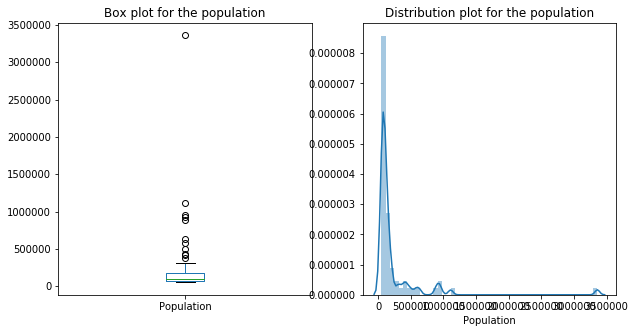

In [26]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

#box plot
data['Population'].plot(kind='box',ax=axs[0])
sns.distplot(data.Population, ax=axs[1])
axs[0].set_title("Box plot for the population")
axs[1].set_title("Distribution plot for the population")

    We can see the data is not well distributed as the city of `Casablanca` has almost all the mass. This will be a good feature for the clustering as it will differ crowdy and calm cities.    

## Features venues variables

Let's plot and see the values on the `venues` variables. This is data that was gathered for each town using the **foursquare** api

In [42]:
venues = ['Café','Hotel', 'Moroccan Restaurant', 'Coffee Shop', 'Diner']

Text(0.5, 1.0, 'Distribution plot for the Café')

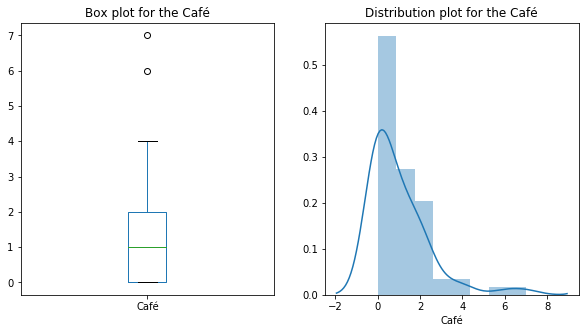

In [51]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

#box plot
data['Café'].plot(kind='box',ax=axs[0])
sns.distplot(data['Café'], ax=axs[1])
axs[0].set_title("Box plot for the Café")
axs[1].set_title("Distribution plot for the Café")

## Correlation
Let plot and search if there is a correlation between the venues

In [56]:
corr = data[venues].corr()

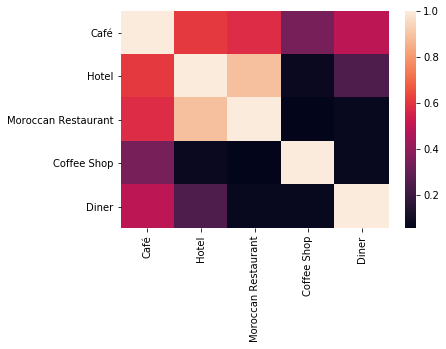

In [57]:
sns.heatmap(corr)

We can remark that there is a strong correlation between `Café` and `Hotel` and `Moroccan Restaurant`

to test that let's plot the the regression line between those two variables

Text(0.5, 1.0, 'Regression between Hotel and Moroccan Restaurant')

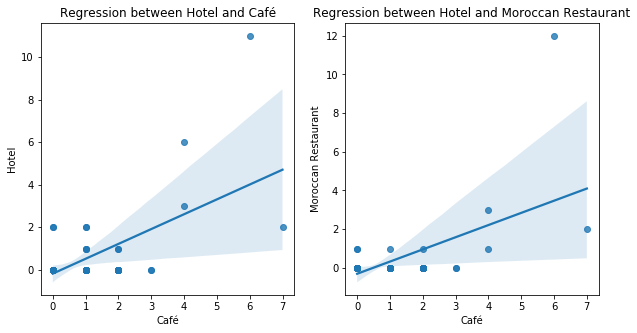

In [60]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.regplot(data['Café'], data['Hotel'],ax=axs[0])
axs[0].set_title('Regression between Hotel and Café')
sns.regplot(data['Café'], data['Moroccan Restaurant'],ax=axs[1])
axs[1].set_title('Regression between Hotel and Moroccan Restaurant')


## Data preparation for clustering

The first step for the clustering is normalize the data

In [90]:
from sklearn.preprocessing import StandardScaler

In [99]:
normalizer = StandardScaler()

In [100]:
for col in data.columns:
    data[col] = normalizer.fit_transform(data[[col]])

In [101]:
data

,Population,latitude,longitude,Café,Hotel,Moroccan Restaurant,Coffee Shop,Diner
City,,,,,,,,
Casablanca,6.950718,-0.035651,-0.196372,2.137331,3.411629,1.757776,1.125446,0.956183
Fez,1.941305,0.097944,-0.034972,-0.712444,-0.325360,0.441899,1.125446,-0.378489
Tangier,1.575541,0.627486,-0.083815,2.137331,1.543135,0.441899,-0.478913,6.294871
Marrakesh,1.532969,-0.634115,-0.219342,3.562218,6.525787,7.679225,-0.478913,-0.378489
Salé,1.447285,0.101055,-0.146465,0.000000,-0.325360,-0.216040,-0.478913,-0.378489
...,...,...,...,...,...,...,...,...
M'diq,-0.411792,0.598997,-0.054012,1.424887,-0.325360,-0.216040,-0.478913,-0.378489
Sidi Bennour,-0.412710,-0.322625,-0.246321,0.712444,-0.325360,-0.216040,1.125446,0.956183
Midelt,-0.413849,-0.313639,-0.017837,0.000000,0.297472,-0.216040,1.125446,-0.378489


Now it better, let's run the `KMeans` to cluster the data

In [102]:
from sklearn.cluster import KMeans

In [103]:
segmenter = KMeans(n_clusters=4)

In [105]:
segmenter.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
print(segmenter.labels_)

[2 1 0 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


### Plotting the results

In [108]:
import folium

(-9, 0)

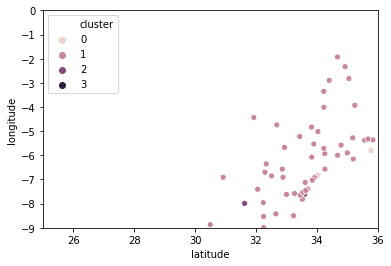

In [149]:
position = [31.79, -7.02]
morocco = folium.Map(position, zoom_start=7)
sns.set_palette('muted')
data = pd.read_csv("morocan_cities.csv", index_col=0)  #normalizatin loose the coordinates
data['cluster'] = segmenter.labels_.astype('int')
ax = sns.scatterplot(x='latitude', y = 'longitude', hue='cluster',data=data)
ax.set_xlim([25, 36])
ax.set_ylim([-9,0])